In [1]:
import numpy as np
from tqdm import tqdm
import scipy
from scipy import sparse
import pickle as pkl
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import json
import random
import math
import networkx as nx
import pandas as pd
import csv
import os,sys,re
from itertools import cycle, islice

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from sklearn.datasets import load_digits
import seaborn as sns

### Visualization
- t-SNE to map d-dimension vector into 2-d coordinates, example: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
- seaborn package to plot, example: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [5]:
# example data
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

from collections import defaultdict
classes = defaultdict(int)
for i in y:
    classes[i] += 1
print(len(classes))

(1797, 64) (1797,)
10


In [3]:
MACHINE_EPSILON = np.finfo(np.double).eps
tsne = manifold.TSNE(n_components=2, perplexity=50, 
                     early_exaggeration=12, learning_rate = 400, 
                     init='pca')
X_2d = tsne.fit_transform(X)
print(X_2d.shape)

(1797, 2)


/zf18/ll5fy/.conda/envs/torch180-cu101/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


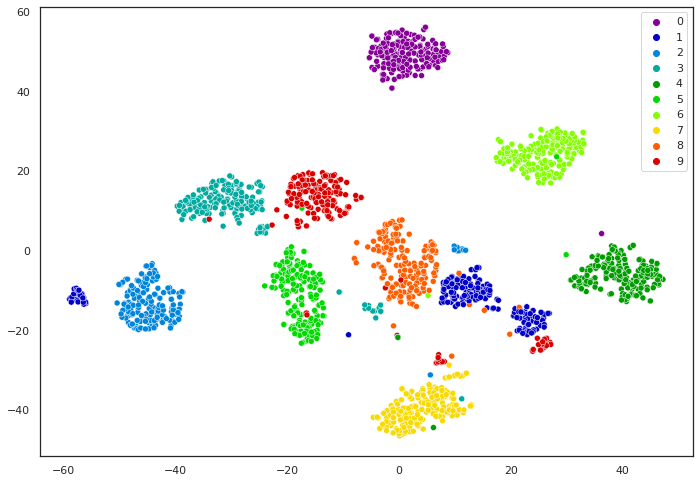

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
palette = sns.color_palette('nipy_spectral', len(classes)) # nipy_spectral, YlGnBu, Set2, husl
g = sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=y, palette=palette)